In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import sys
from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter, save_results, load_results)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario)
from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.evaluators import LHS, SOBOL, MORRIS
from ema_workbench.em_framework.optimization import EpsilonProgress, HyperVolume
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.analysis import feature_scoring, prim, dimensional_stacking, pairs_plotting
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
import ema_workbench.em_framework.samplers
from SALib.analyze import sobol
from SALib.sample import saltelli, morris, fast_sampler
import SALib.util.results
from ema_workbench.analysis import regional_sa
from numpy.lib import recfunctions as rf
from ema_workbench.util import ema_logging
from funs_project import get_opti_policies, get_selected_policies
import time
from problem_formulation import get_model_for_problem_formulation
ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

[MainProcess/INFO] results loaded succesfully from C:\Users\David2\Documents\GitHub\FabiosDecisions\epa1361\final assignment\results\extra_trees_sobol_100_Overijssel.tar.gz
[MainProcess/INFO] model dropped from analysis because only a single category


Starting feature scoring: Overijssel


[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


Feature scoring visualization saved: Overijssel
Done!


[MainProcess/INFO] results loaded succesfully from C:\Users\David2\Documents\GitHub\FabiosDecisions\epa1361\final assignment\results\extra_trees_sobol_100_Gorssel.tar.gz
[MainProcess/INFO] model dropped from analysis because only a single category


Starting feature scoring: Gorssel


[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


Feature scoring visualization saved: Gorssel
Done!


[MainProcess/INFO] results loaded succesfully from C:\Users\David2\Documents\GitHub\FabiosDecisions\epa1361\final assignment\results\extra_trees_sobol_100_Deventer.tar.gz
[MainProcess/INFO] model dropped from analysis because only a single category


Starting feature scoring: Deventer


[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


Feature scoring visualization saved: Deventer
Done!


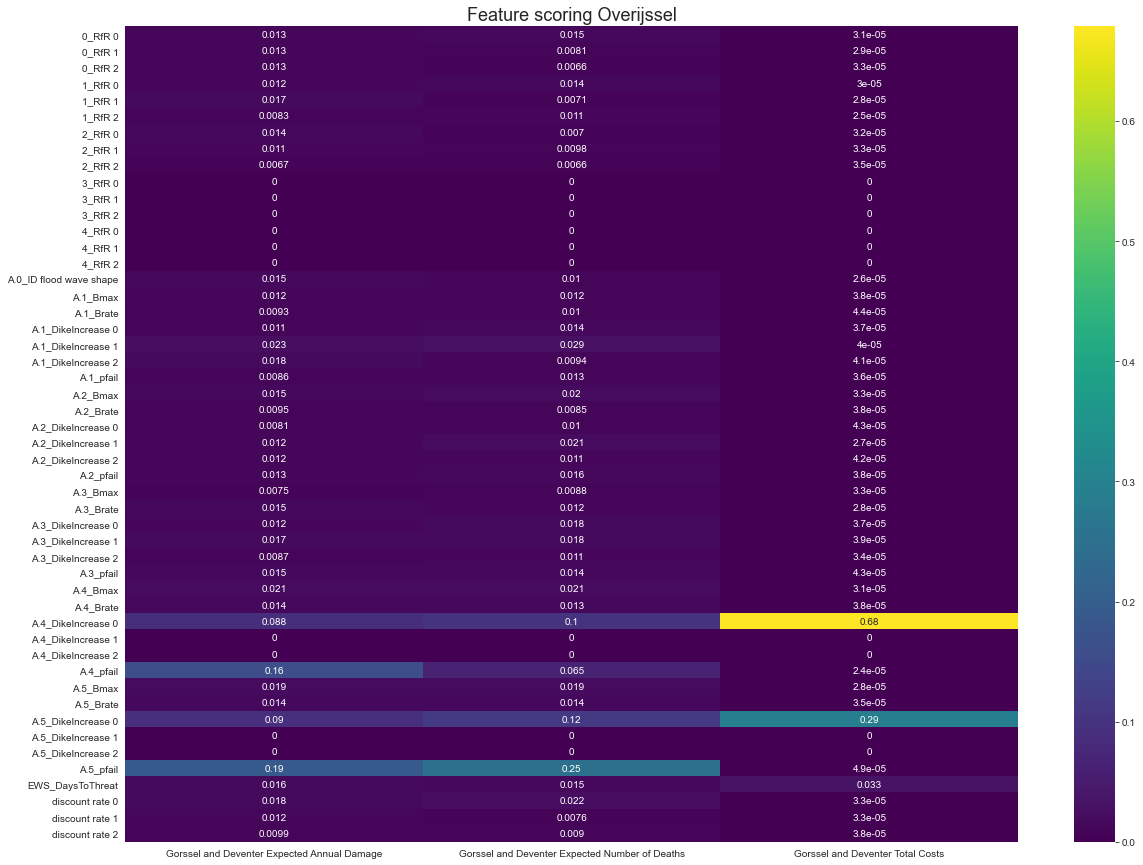

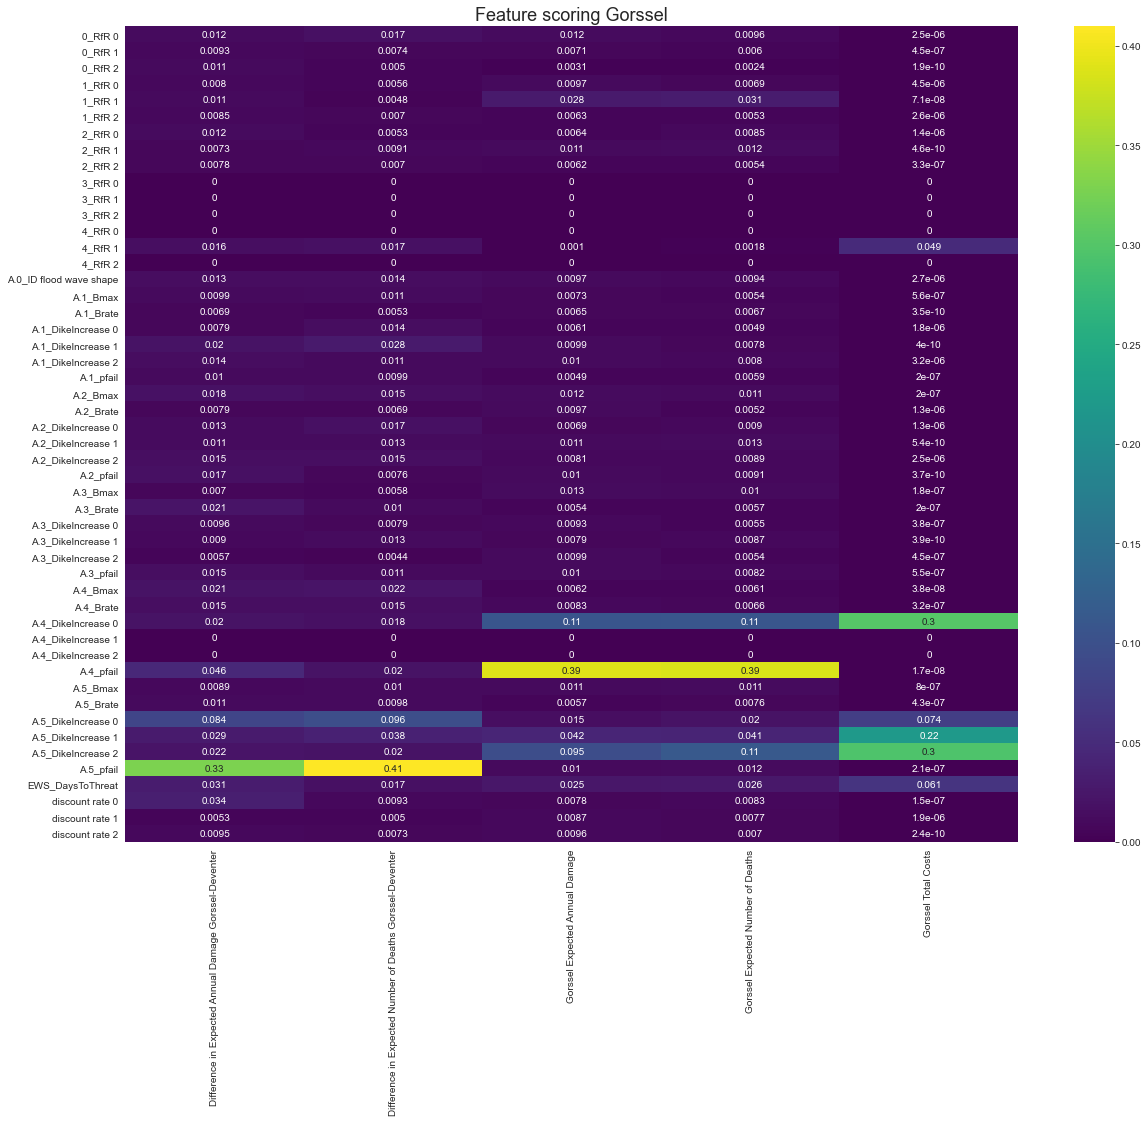

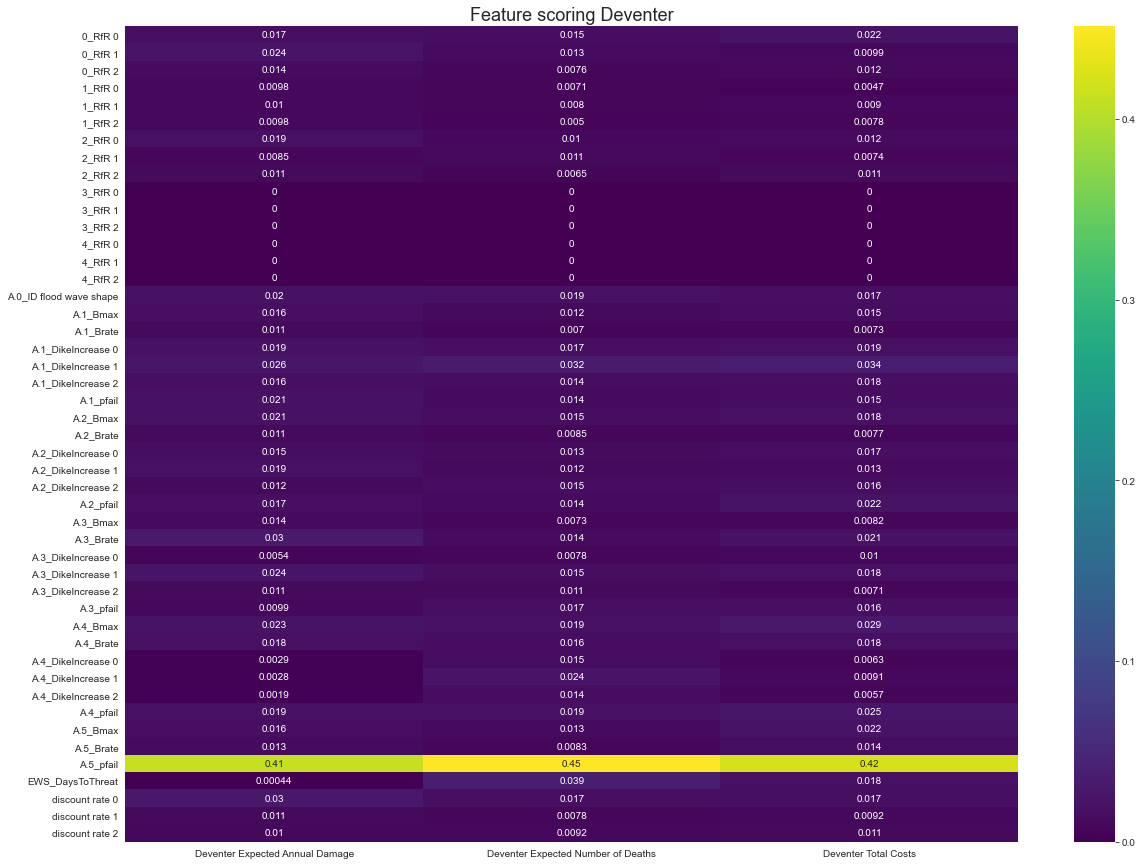

In [8]:
n_scen = 100
actors = ['Overijssel', 'Gorssel', 'Deventer']

for actor in actors:
    x, y = load_results('./results/extra_trees_sobol_' + str(n_scen) + '_' + actor + '.tar.gz')

    print('Starting feature scoring:', actor)

    fs = feature_scoring.get_feature_scores_all(x.drop('policy', axis=1), y, alg='extra trees')

    # Set up figure
    sns.set_style('white')
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(20, 15)

    sns.heatmap(fs, cmap='viridis', annot=True, ax=ax)
    ax.set_title('Feature scoring ' + actor, fontsize=18)

    # Might wanna add to appendices, but better if we make our own visualisation to merge all the actors
    # and show what each one is sensitive to

    plt.show
    #plt.savefig('../../report/figures/results/Feature_scoring_' + actor + '_' + str(n_scen) + 'scen.png')

    print('Feature scoring visualization saved:', actor)

    print('Done!')

In [5]:
actor = 'Overijssel'
n_scen = 100

x, y = load_results('./results/extra_trees_sobol_' + str(n_scen) + '_' + actor + '.tar.gz')

x.drop('policy', axis=1)

[MainProcess/INFO] results loaded succesfully from C:\Users\David2\Documents\GitHub\FabiosDecisions\epa1361\final assignment\results\extra_trees_sobol_100_Overijssel.tar.gz


,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,A.0_ID flood wave shape,...,4_RfR 2,EWS_DaysToThreat,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,model
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,89.0,...,0.0,3.0,5.0,0.0,0.0,5.0,0.0,0.0,0,dikesnet
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,89.0,...,0.0,3.0,5.0,0.0,0.0,5.0,0.0,0.0,1,dikesnet
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,89.0,...,0.0,3.0,5.0,0.0,0.0,5.0,0.0,0.0,2,dikesnet
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,89.0,...,0.0,3.0,5.0,0.0,0.0,5.0,0.0,0.0,3,dikesnet
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,89.0,...,0.0,3.0,5.0,0.0,0.0,5.0,0.0,0.0,4,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37995,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,7.0,...,0.0,3.0,0.0,0.0,0.0,7.0,0.0,0.0,7595,dikesnet
37996,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,7.0,...,0.0,3.0,0.0,0.0,0.0,7.0,0.0,0.0,7596,dikesnet
37997,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,7.0,...,0.0,3.0,0.0,0.0,0.0,7.0,0.0,0.0,7597,dikesnet
37998,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,7.0,...,0.0,3.0,0.0,0.0,0.0,7.0,0.0,0.0,7598,dikesnet
